### <center> DAIMOND PRICE PREDICTION


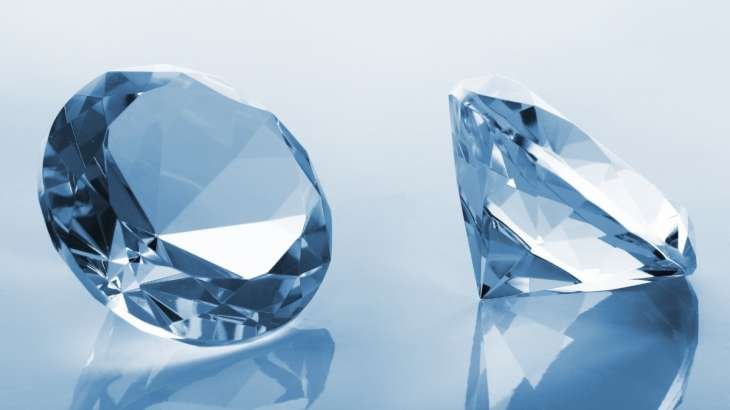

   ### ABOUT
####  These dataset contain 10 features in which 'Price(in US dollars)' is dependent feature. The goal is we have to predict the price of Diamond using different Regression Algorithms

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import klib as k
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('C:\\Users\\USER\\DA\\Data Sets\\PROJECT DATASETS\\cubic_zirconia.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


###  EDA

In [3]:
df.drop(columns="Unnamed: 0",inplace=True)

In [4]:
df['cut'] = df['cut'].str.replace('^b','')

In [5]:
df['clarity'] = df['clarity'].str.replace('^b','')
df['color'] = df['color'].str.replace('^b','')

In [6]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [7]:
df.shape

(26967, 10)

In [8]:
df.isnull().mean()*100

carat      0.00000
cut        0.00000
color      0.00000
clarity    0.00000
depth      2.58464
table      0.00000
x          0.00000
y          0.00000
z          0.00000
price      0.00000
dtype: float64

In [9]:
df.duplicated().sum()

34

In [10]:
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


#### DATA VISUALIZATION

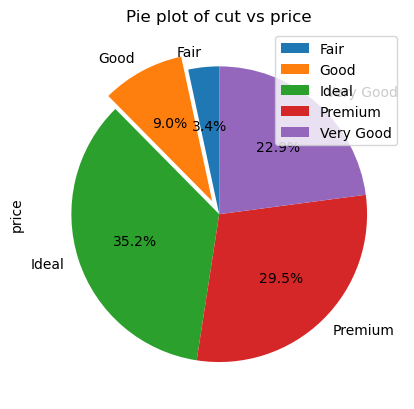

In [12]:
cut_price = df.groupby(['cut'])['price'].sum()
cut_price.plot.pie(title='Pie plot of cut vs price',
                   autopct='%1.1f%%', startangle=90, explode=[0, 0.1, 0, 0, 0], legend=True);


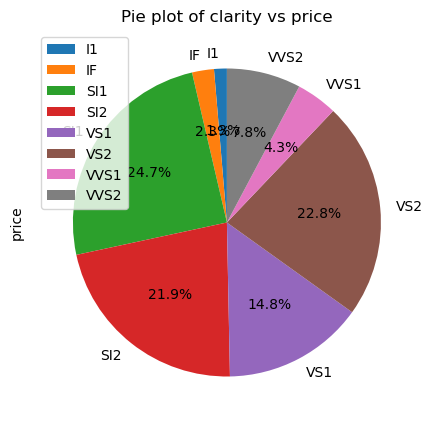

In [13]:
clarity_price = df.groupby(['clarity'])['price'].sum()
clarity_price.plot.pie(title='Pie plot of clarity vs price',
                   autopct='%1.1f%%', startangle=90,legend=True,figsize=(5,5));

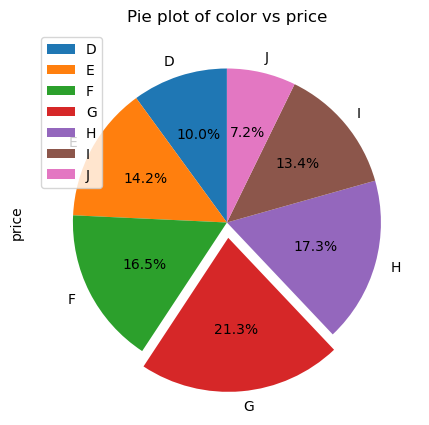

In [14]:
cut_price = df.groupby(['color'])['price'].sum()
cut_price.plot.pie(title='Pie plot of color vs price',
                   autopct='%1.1f%%', startangle=90,legend=True,explode=[0, 0, 0, 0.1,0,0,0],figsize=(5,5));

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


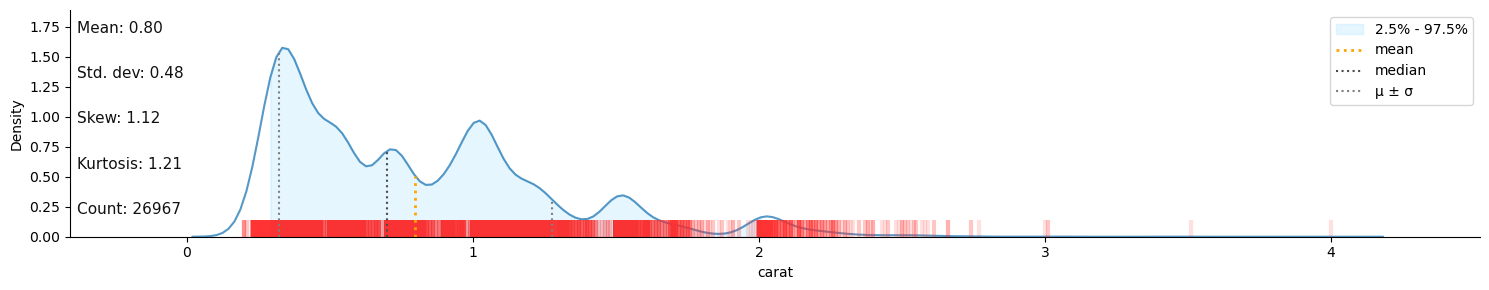

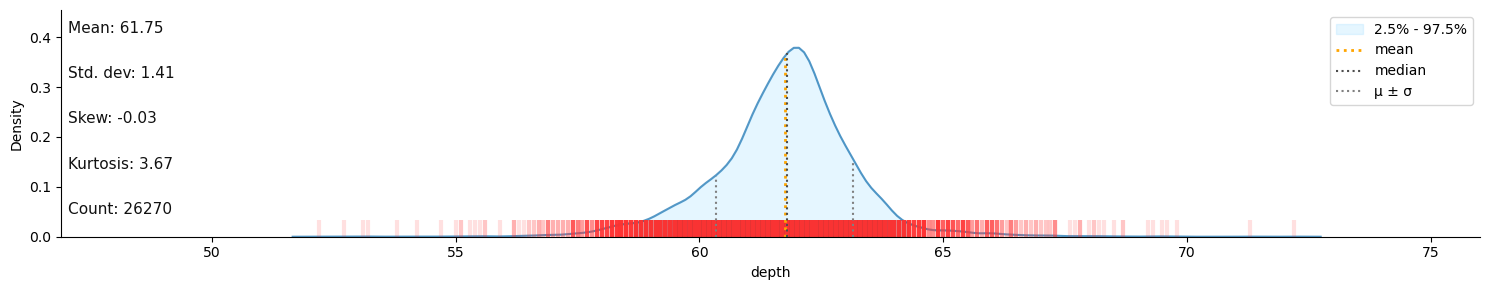

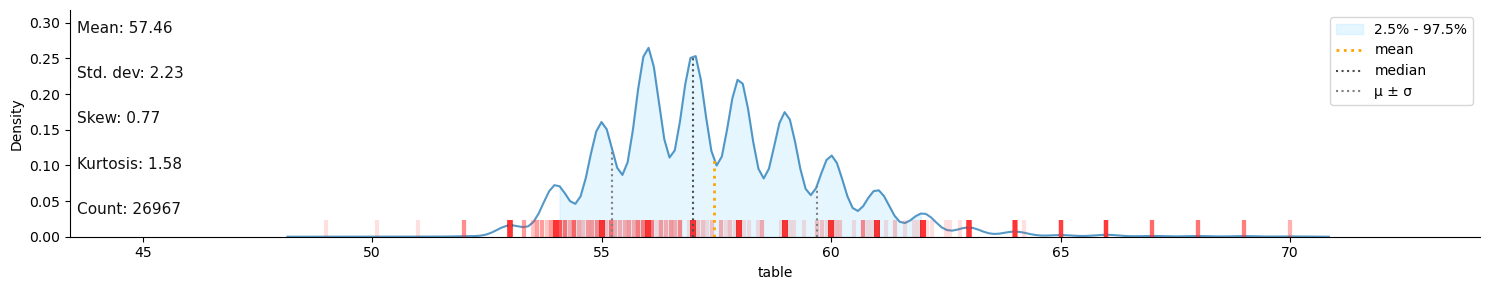

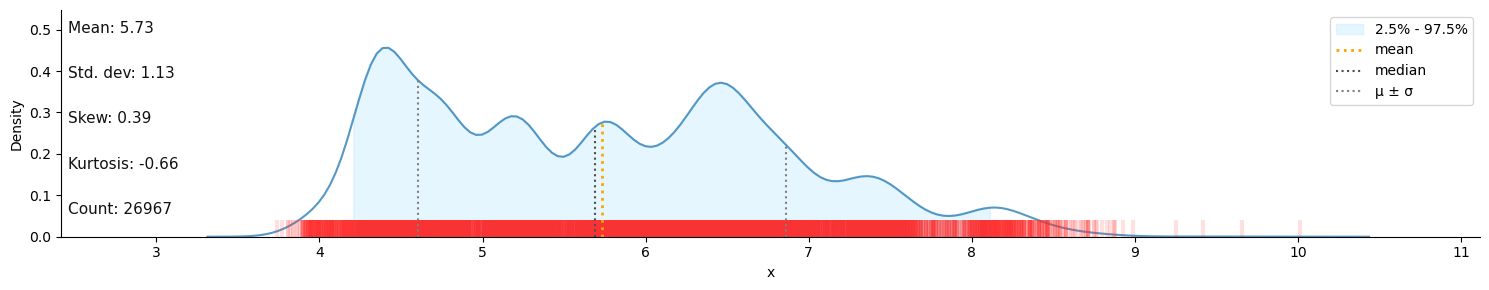

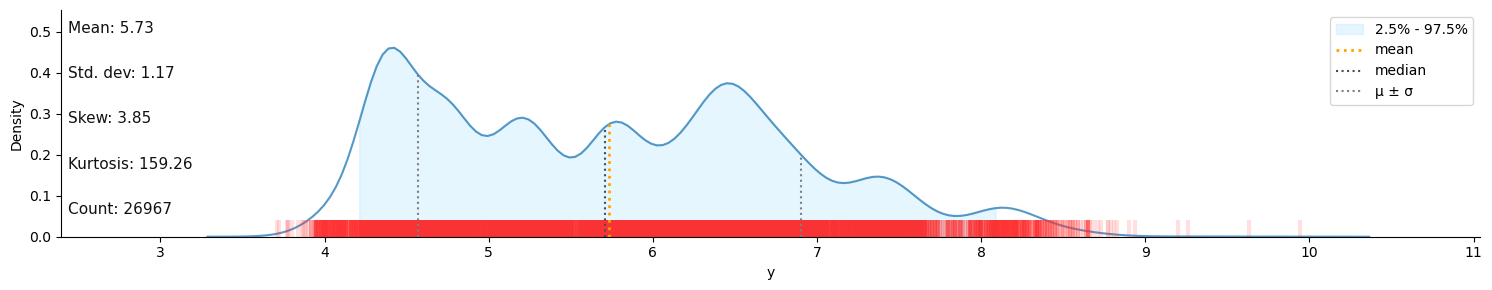

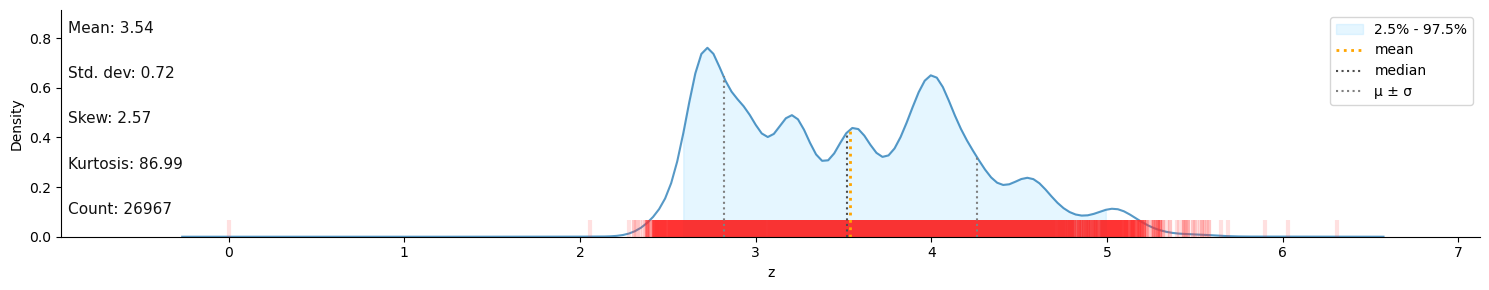

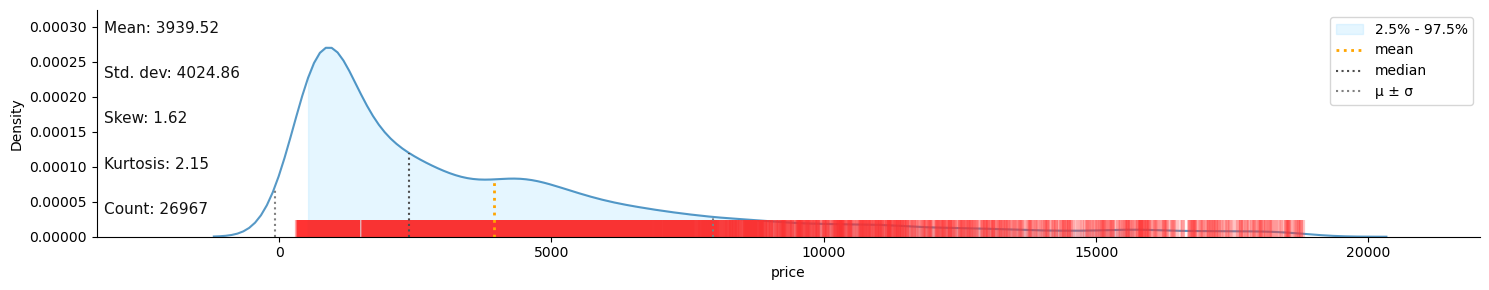

In [15]:
k.dist_plot(df);

In [16]:
df.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

### changing catagorical data to numerical

In [17]:
le=LabelEncoder()

In [18]:
df["cut"]=le.fit_transform(df.cut)

In [19]:
df["color"]=le.fit_transform(df.color)
df["clarity"]=le.fit_transform(df.clarity)

In [20]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60,682


### KDA PLOT

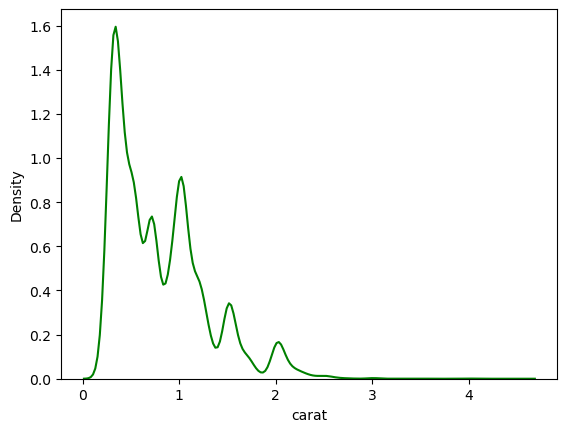

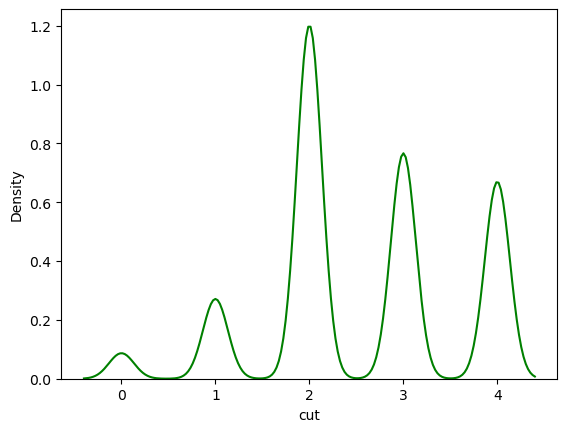

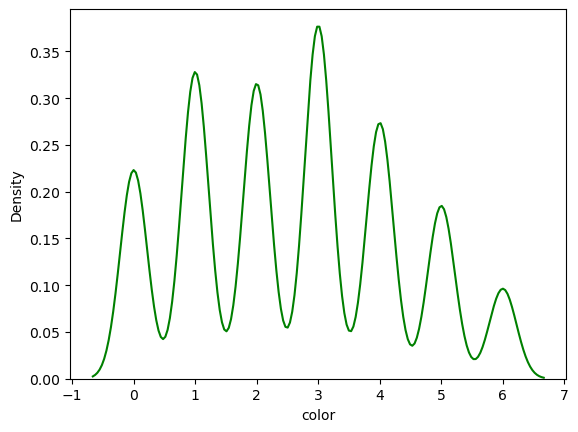

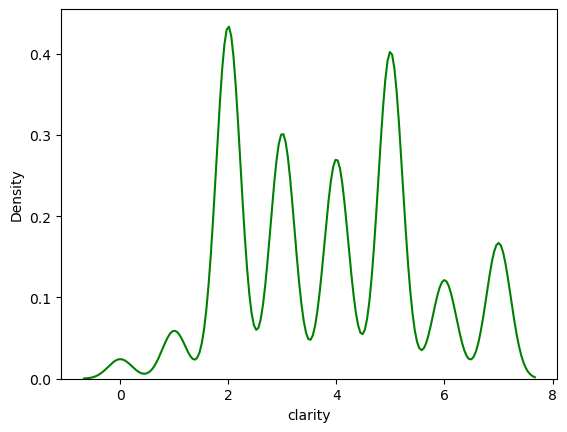

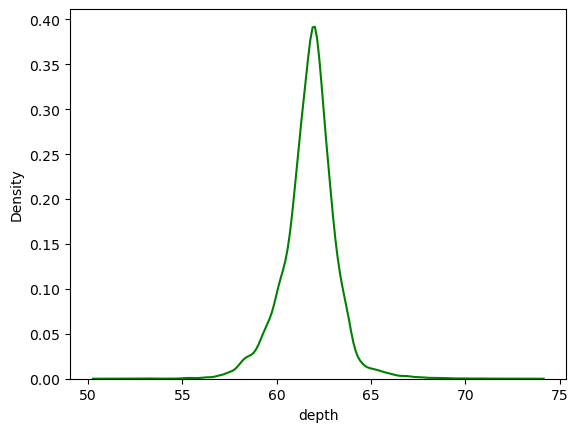

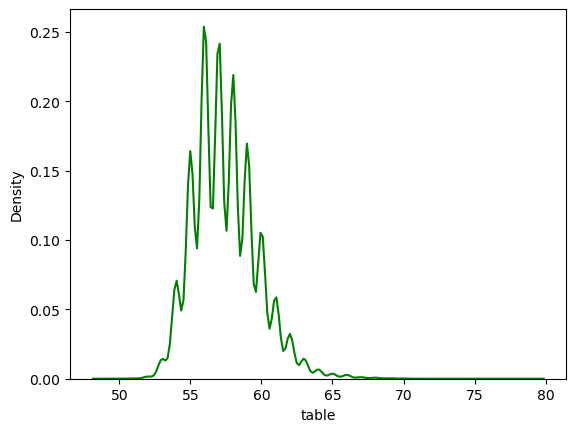

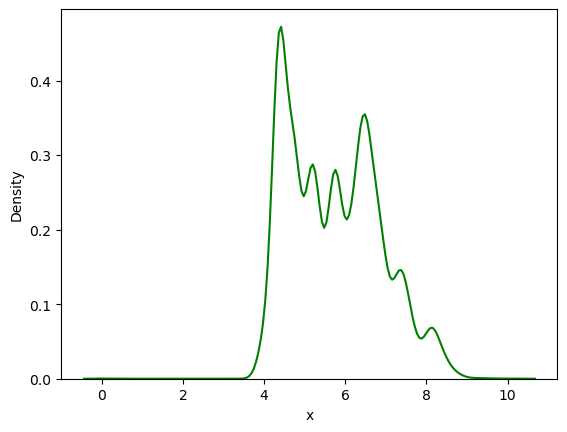

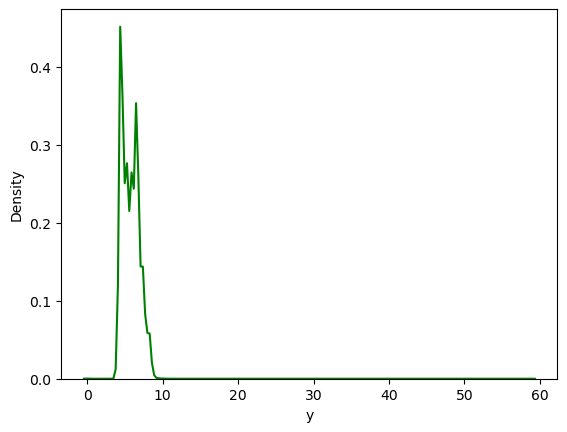

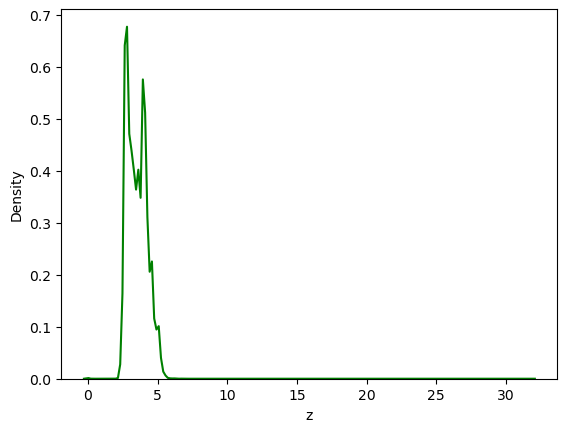

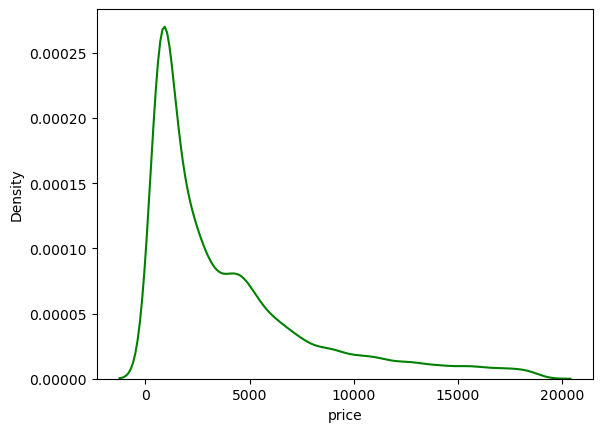

In [21]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(x=df[i],color="GREEN")
        plt.show();

  ### HISTOGRAM

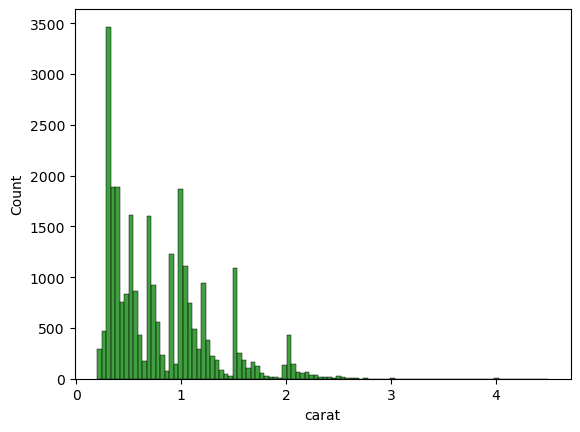

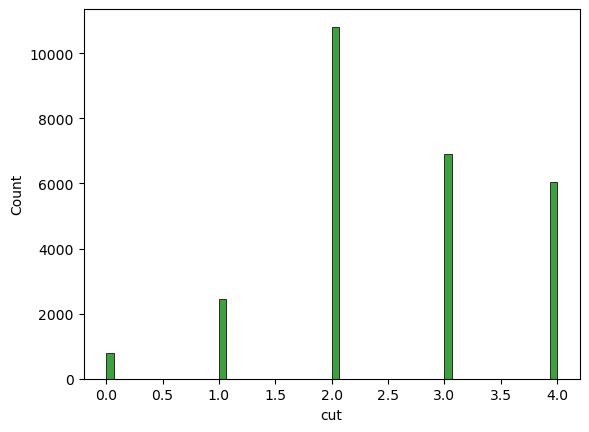

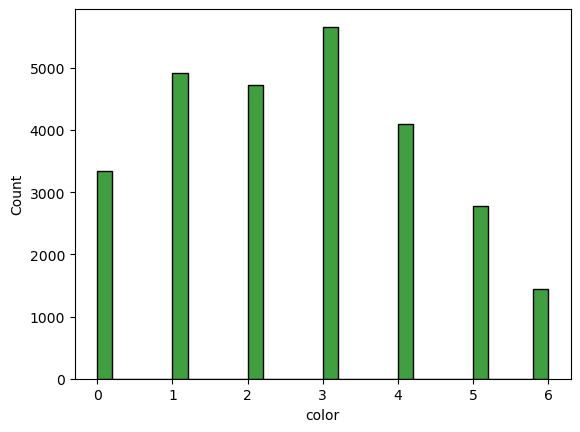

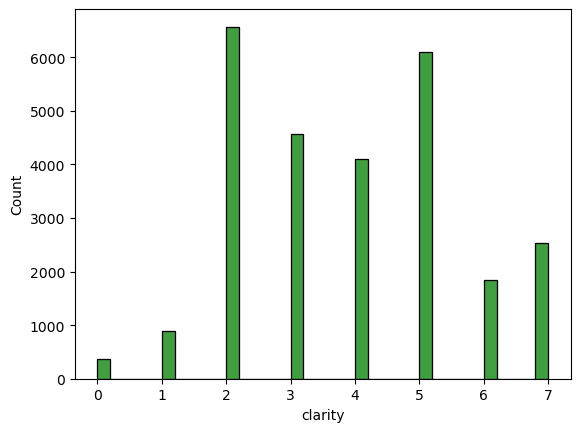

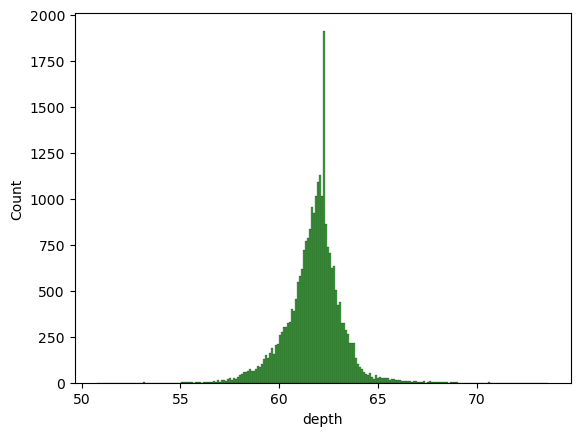

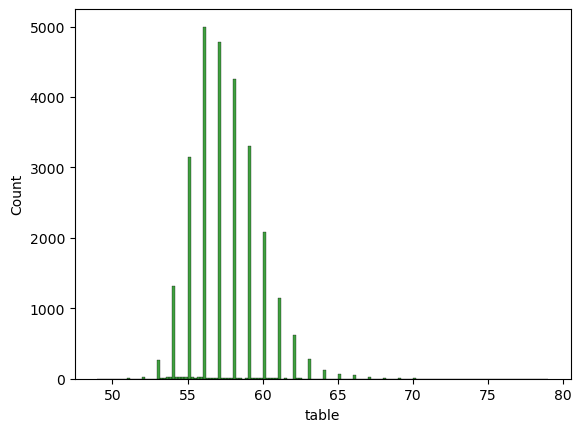

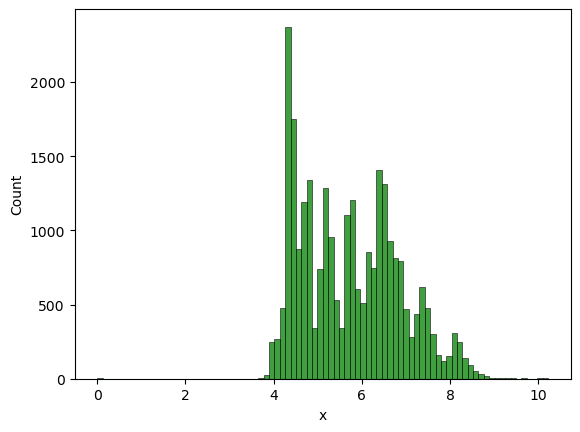

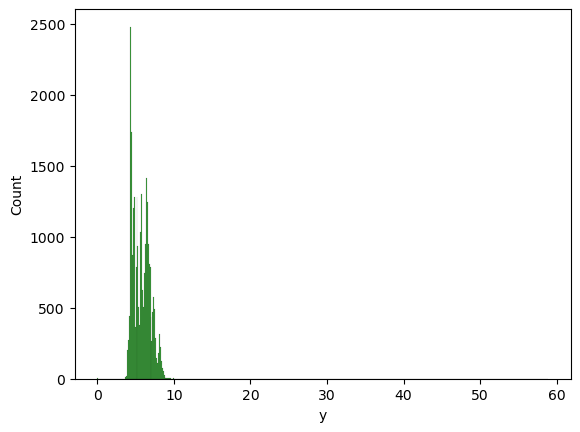

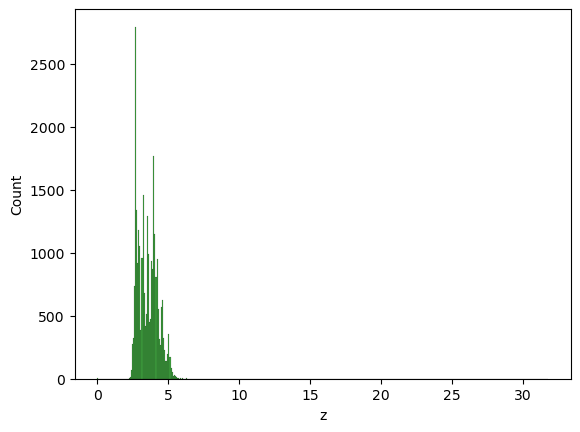

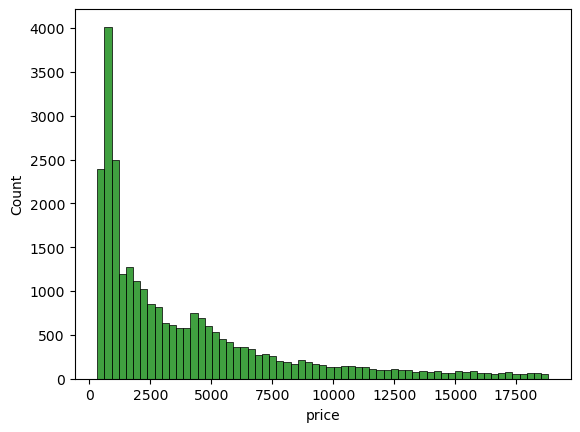

In [22]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i],color="GREEN")
        plt.show();

### HEATMAP


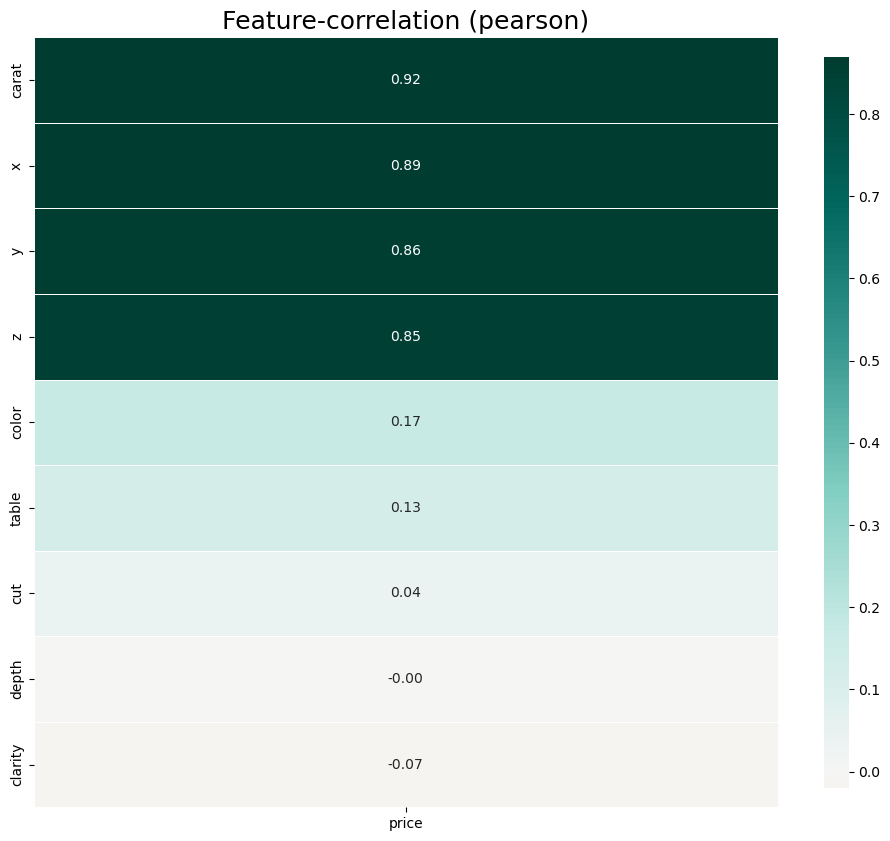

In [23]:
k.corr_plot(data=df,target="price");

In [24]:
k.clean_column_names(df)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60,682


### boxplot

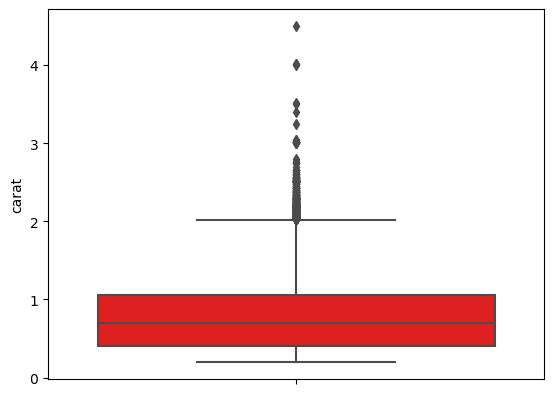

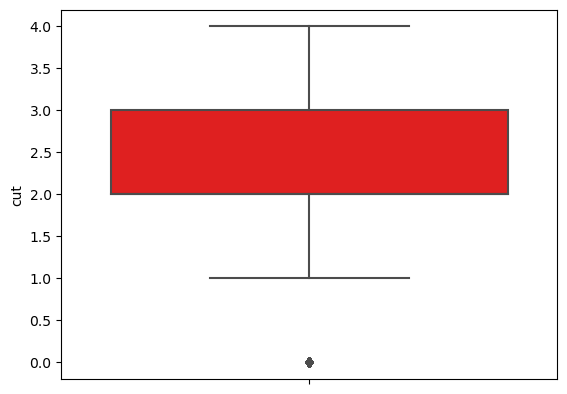

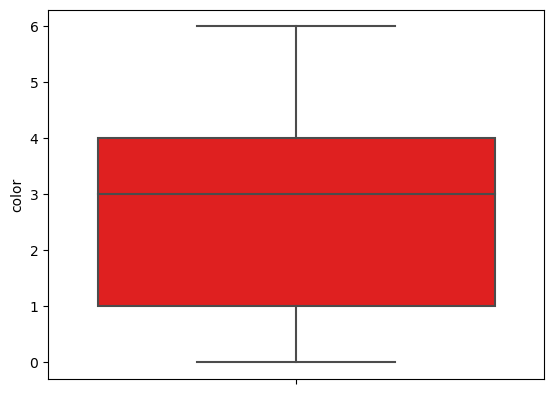

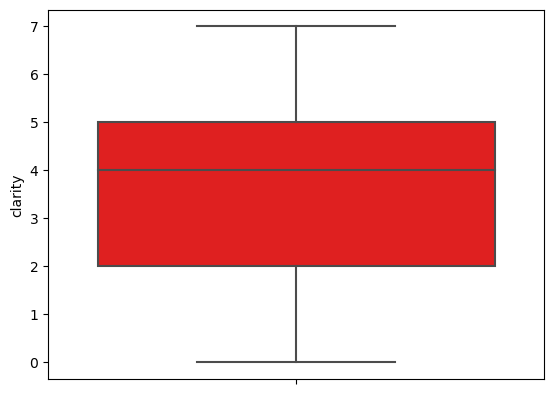

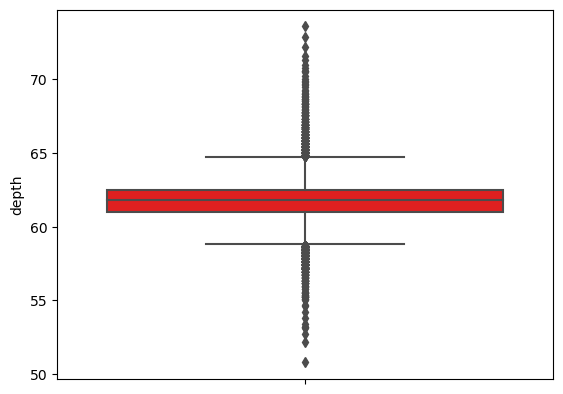

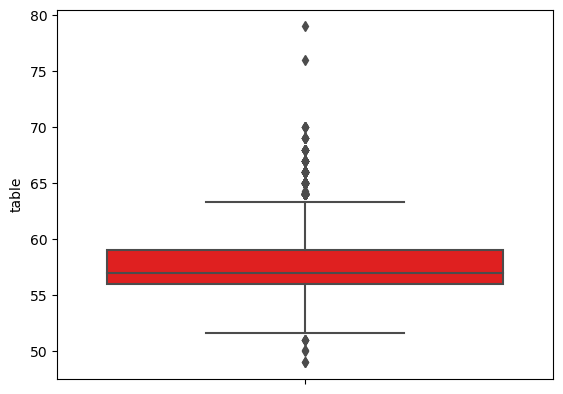

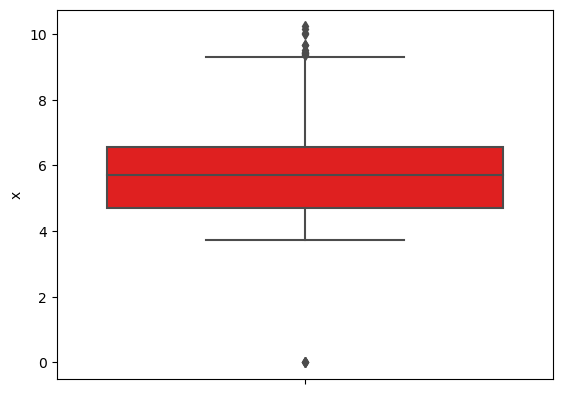

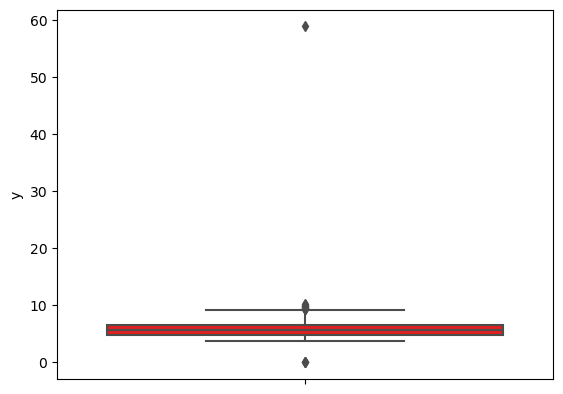

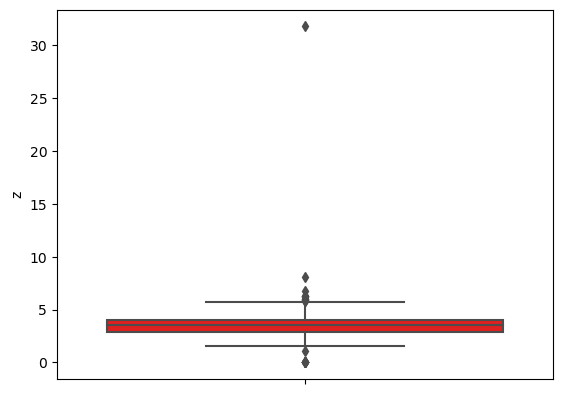

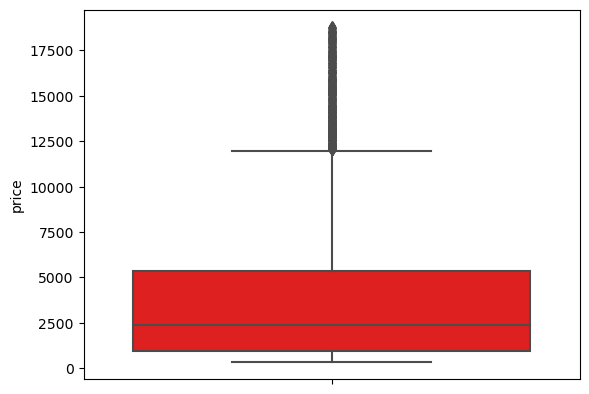

In [25]:
for i in df.columns:
    if df[i].dtype!="object":
            sns.boxplot(y=df[i],color="red")
            plt.show()
            

### cleaning the outliers

In [26]:
def outlier(col):
    Q3, Q1= np.nanpercentile(col,[75,25])
    iqr=Q3-Q1
    ul=Q3+1.5*iqr
    ll=Q1-1.5*iqr
    return ul, ll

In [27]:
for column in df.columns:
    if df[column].dtype !="object":
        ul,ll=outlier(df[column])
        df[column]=np.where((df[column]>ul)|(df[column]<ll),np.nan,df[column])

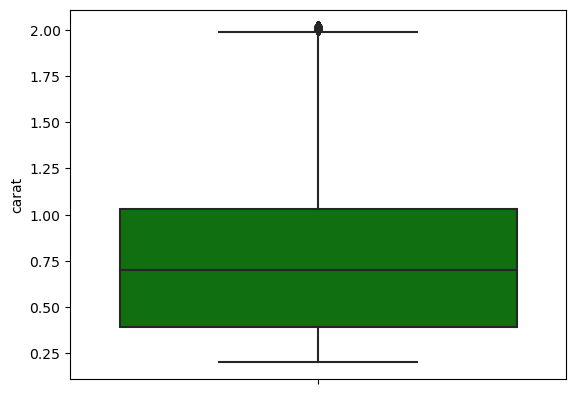

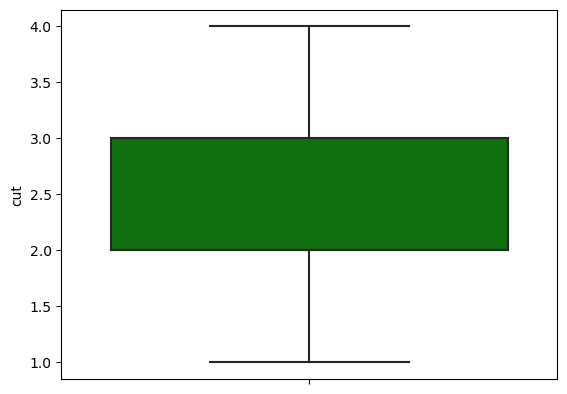

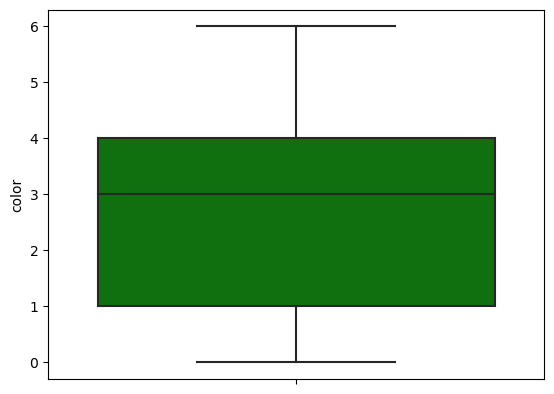

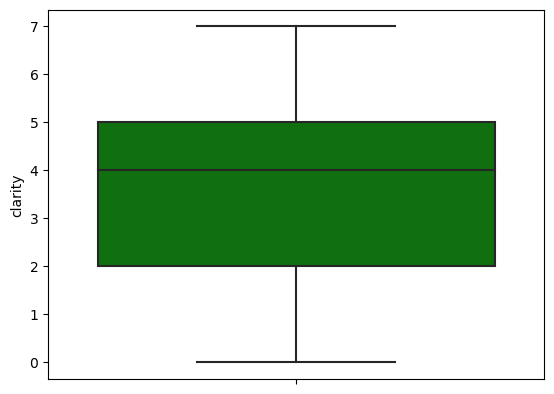

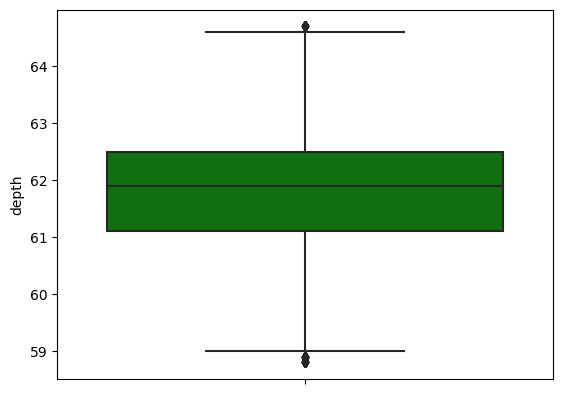

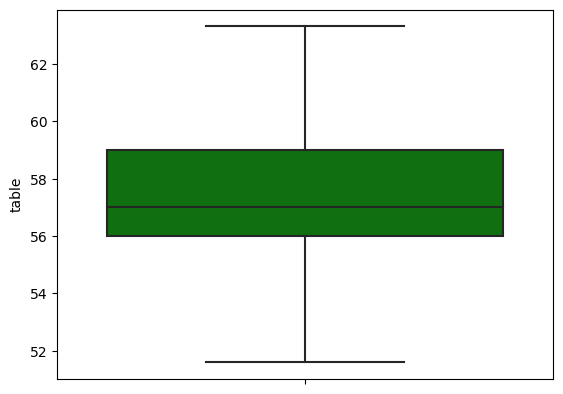

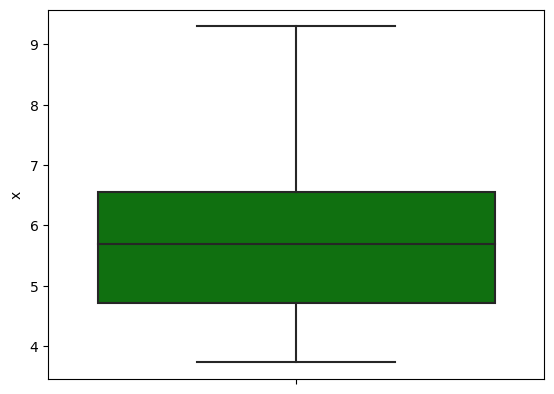

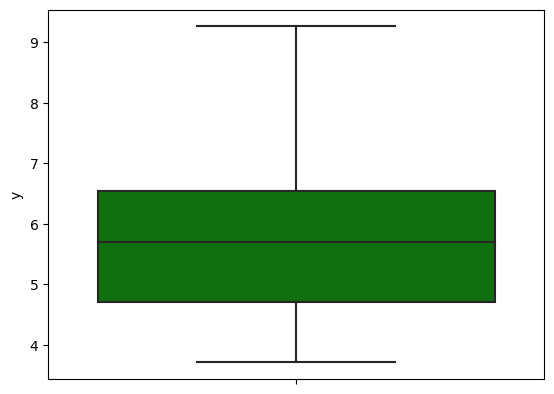

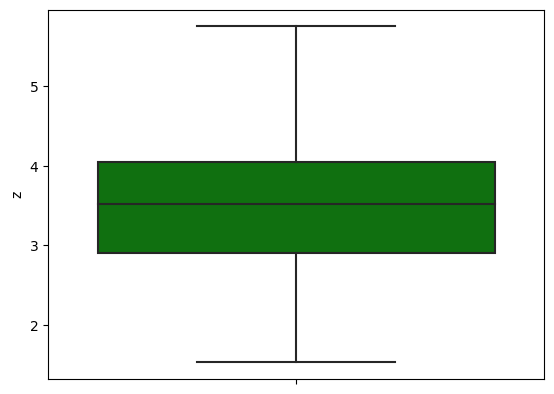

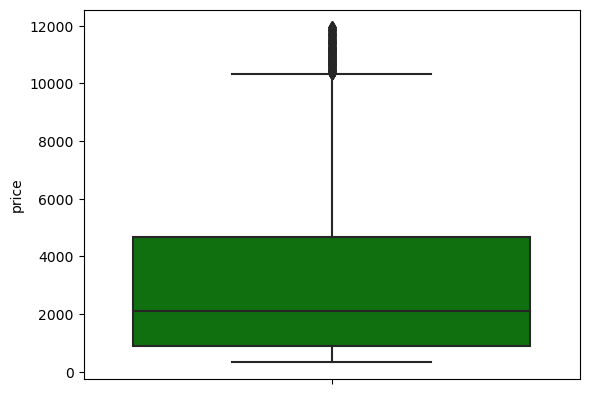

In [28]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color="green")
        plt.show()

In [29]:
df.dropna(inplace=True)

### REGRESSION

In [30]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2.0,1.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,1.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,4.0,1.0,7.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2.0,2.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2.0,2.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3.0,3.0,2.0,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,2.0,4.0,1.0,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,3.0,1.0,5.0,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,4.0,2.0,7.0,61.8,56.0,4.19,4.20,2.60,682.0


In [31]:
x=df[["carat","cut","color","depth","table","x","y","z"]].values

In [32]:
y=df[["price"]].values

In [33]:
sc=StandardScaler()

In [34]:
x=sc.fit_transform(x)

### CROSS VALIDATION

In [35]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [36]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  997.276855403132
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  997.768017742754
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  997.2476833848201
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1198.6840052958514
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  873.4537824815168
****************************************************************************************************


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
models={
    "linearregression":LinearRegression(),
    "ridge":Ridge(),
    "lasso":Lasso(),
    "decisiontreeregressor":DecisionTreeRegressor(),
    "randomforestregressor":RandomForestRegressor(random_state=0)
}

In [39]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score =model.score(x_train,y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse= mean_squared_error(y_test,model.predict(x_test))
    rmse= np.sqrt(mse)
    print("r2score: ",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("   "*105)

model trained withlinearregression
r2score:  87.21819025858234
training_score: 87.13754271479954
testing_score: 87.21819025858234
mae: 630.1868912303381
mse: 978655.0029251012
rmse_test: 989.2699343076697
                                                                                                                                                                                                                                                                                                                           
model trained withridge
r2score:  87.21668416809068
training_score: 87.13736632838867
testing_score: 87.21668416809068
mae: 630.3098906005878
mse: 978770.3185982596
rmse_test: 989.3282158102334
                                                                                                                                                                                                                                                                                             

### model training


In [40]:
model=RandomForestRegressor()

In [41]:
model.fit(x_train,y_train)

RandomForestRegressor()

 ### PRICE PREDICTION

In [42]:
y_pred = model.predict(x)

In [43]:
op=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)


### scatterplot

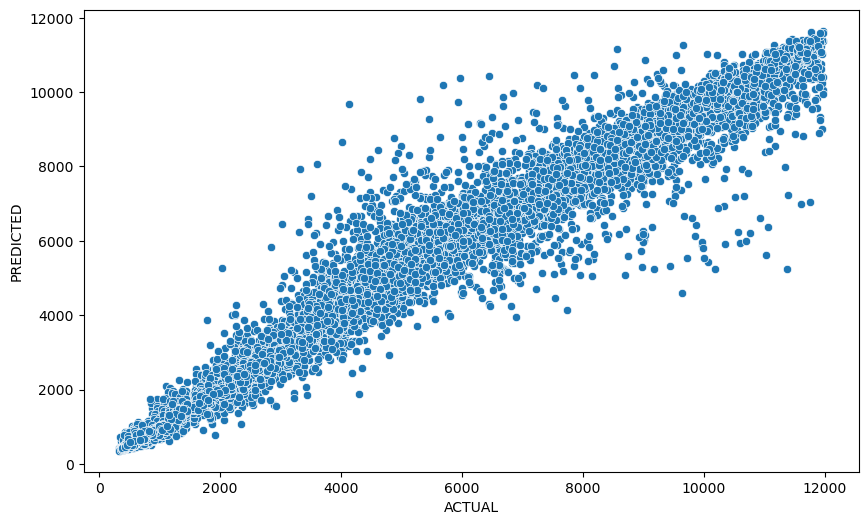

In [44]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.scatterplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();

### LINE PLOT

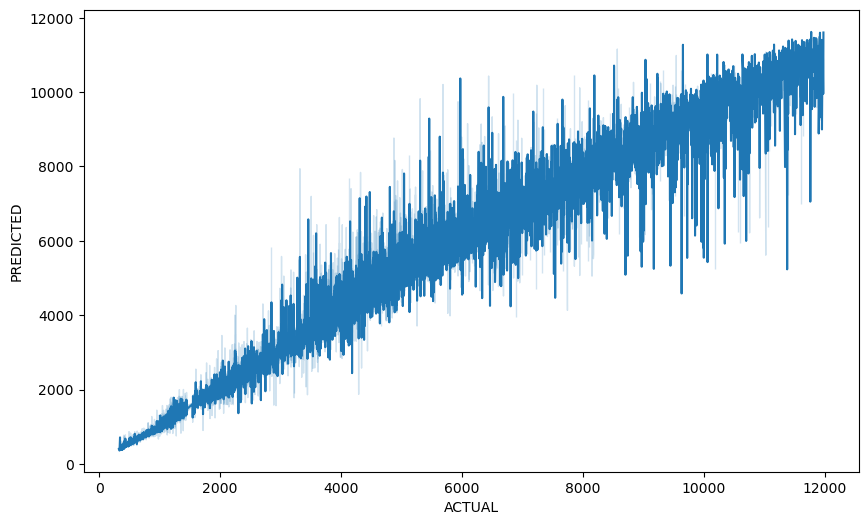

In [45]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.lineplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();